
#  📙 Filtering
Filtering is a technique for modifying or enhancing an image. In essence, a filter is a mathematical function that is applied to images. It can be used to emphasize or remove certain features, like edges. Smoothing, sharpening and edge detection. So we can say, Filtering is a tecknique for :
- Mdifying or enhancing an image.
- Emphasize or remove certain features, like edges.
- Smoothing, sharpening.
- Edge detection

Filtering is a neighborhood operation. Where, **Neighborhood** mean: It is a image processing operations involve processing an image in sections, called blocks or neighborhoods, rather than processing the entire image at once. Filtering, histogram equalization for contrast enhancement, and morphological functions, all three of which use this approach.

### 📌 Edge Detection
With filtering we can detect edges. This technique can be used to find the boundaries of objects within images. As well as segment and extract information like how many coins are in an image. Most of the shape information of an image is enclosed in edges.

Edge detection works by detecting discontinuities in brightness. Like in this image, where we spot the chocolate kisses shapes in the image.

Original            |  Edges with Sobel
:-------------------------:|:-------------------------:
![](./sampleImages/Chapter2/originalChocolate.png)  |  ![](./sampleImages/Chapter2/edgeWithSobel.png)

<br/>

### 📌 Edge Detection Algorithm
#### Sobel
A common edge detection algorithm is **Sobel**. This is a filter that we can find in scikit image's module filters with the sobel function. We apply the filter by passing the image we want to detect the edges from as parameter. This function requires a 2-dimensional grayscale image as input. So in the case of a colored image, we'll need to convert it to grayscale first. Then, we show the original and the resulting image with a function that uses Matplotlib subplots.

```python
# Import module and function
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(image_coins)

# Show original and resulting image to compare
plot_comparison(image_coins, edge_sobel, "Edge with Sobel")
```

Original            |  Edges with Sobel
:-------------------------:|:-------------------------:
![](./sampleImages/Chapter2/original_coin.png)  |  ![](./sampleImages/Chapter2/edgeWithSobelCoin.png)

<br/>

#### Comparing plots
Fuction for comparing a original and filtered image (This function details is not discussed in this course)

```python
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
```


### 📌 Smoothing
#### Gaussian smoothing
We can achieve this with a Gaussian filter. This technique is typically used to blur an image or to reduce noise. Lets see how we can do this with Scikit image using this picture of me in Amsterdam.

We import the Gaussian function from the filters module of scikit-image. To apply the filter, the original image is passed as first parameter to the Gaussian function and the multichannel boolean parameter is set to True if the image is colored, otherwise it needs to be set to False. Finally, lets compare the original and the resulting image.

```python
# Import the module and function
from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image = gaussian(amsterdam_pic, multichannel=True)

# Show original and resulting image to compare
plot_comparison(amsterdam_pic, gaussian_image, "Blurred with Gaussian filter")
```
Guassian filter can blur the image and remove noise from image


<br/>

### 📝 Edge detection
In this exercise, we'll detect edges in an image by applying the Sobel filter.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

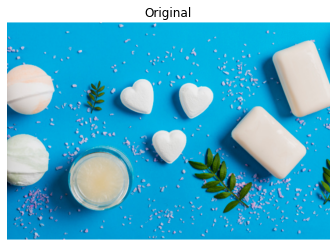

In [3]:
from skimage import color
from skimage.filters import sobel

soaps_image = plt.imread('./sampleImages/Chapter2/soap_image.png')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(color.rgba2rgb(soaps_image))

# Show original image
show_image(soaps_image, 'Original')

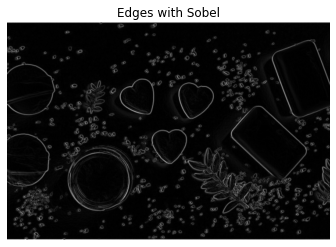

In [4]:
# apply edge detection filters
edge_sobel = sobel(soaps_image_gray)

show_image(edge_sobel, 'Edges with Sobel')

<br/>

### 📝 Blurring to reduce noise
In this exercise we will reduce the sharpness of an image of a building taken during a London trip, through filtering.

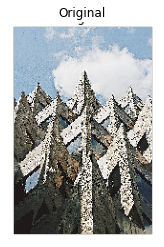

In [5]:
from skimage.filters import gaussian

building_image = plt.imread('./sampleImages/Chapter2/building.png')

# Show the original image
show_image(building_image, 'Original')

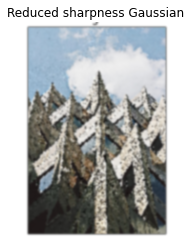

In [6]:
# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)
show_image(gaussian_image, 'Reduced sharpness Gaussian')

<br/><br/>

#  📙 Contrast Enhancement
Image enhancement can be extremely useful in multiple areas. Often medical images like this X-ray can have low contrast, making it hard to spot important details. When we improve the contrast,the details become more visible. It's definitely easier to spot things on this one!

The **Contrast** of an image can be seen as the measure of its dynamic range, or the "spread" of its histogram. Consider this image. 

<img src="./sampleImages/Chapter2/imageHistogram.png" center/>

The contrast is the difference between the maximum and minimum pixel intensity in the image. The histogram of this image is shown on the right. The maximum value of pixel intensity is 255 while the minimum is 0. 255 - 0 = 255.

An image of low contrast has small difference between its dark and light pixel values. Is usually skewed either to the right (being mostly light), to the left (when is mostly dark), or located around the middle (mostly gray).


<img src="./sampleImages/Chapter2/histogramImage.png" center/>

<br/>

## Enhance contrast
- Contrast stretching (It is used to stretch the histogram so the full range of intensity values of the image is filled)
- Histogram equalization (spreads out the most frequent histogram intensity values using probability distribution)
    - Histogram equalization
    - Adaptive histogram equalization
    - Contrast Limited Adaptive Histogram Equalization (CLAHE)


### 📌 Histogram equalization
As we have seen Histogram equalization spreads out the most frequent intensity values.

To apply this type of histogram equalization import the exposure module from scikit-image. We then have access to all equalization methods. In this case, the equalize_hist function, applies normal histogram equalization to the original image. Then we show both images, the original and equalized one to see the difference.
```python
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(image)

# Show original and result
show_image(image, 'Original')
show_image(image_eq, 'Histogram equalized')
```

<img src="./sampleImages/Chapter2/hiequ.png" center/>

Using Histogram equalization We get a result that, despite the increased contrast, doesn't look natural. In fact, it doesn't even look like the image has been enhanced at all.

<br/>

### 📌 Adaptive Equalization
Adaptive Equalization computes several histograms, each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram. A type of this method is the Contrastive Limited Adaptive Histogram Equalization (CLAHE) which was developed to prevent over-amplification of noise that adaptive histogram equalization can give rise to. In this image, we see the result of the CLAHE method and it may seem very similar to the standard method.

**Adaptive method is not that intense, so it looks more natural.** This is because it is not taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods.

#### CLAHE in scikit-image
```python
from skimage import exposure

# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Show original and result
show_image(image, 'Original')
show_image(image_adapteq, 'Adaptive equalized')
```

<img src="./sampleImages/Chapter2/adaptive.png" center/>



<br/>

### 📝 Medical images
We are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

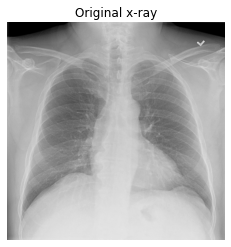

In [7]:
from skimage import exposure

chest_xray_image = plt.imread('./sampleImages/Chapter2/chest_xray_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

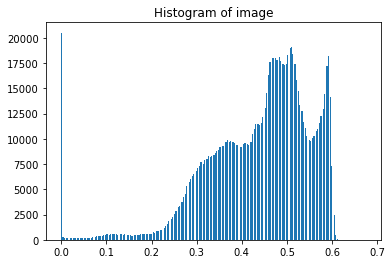

In [8]:
plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256);

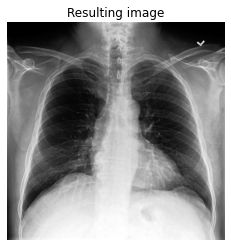

In [9]:
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

<br/><br/>

### 📝 Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

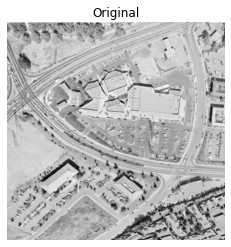

In [13]:
image_aerial = plt.imread('./sampleImages/Chapter2/arial_image.png')

# Show the original image
show_image(image_aerial, 'Original')

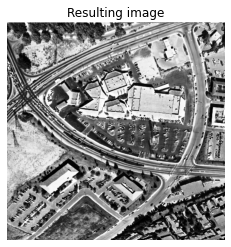

In [14]:
# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

show_image(image_eq, 'Resulting image')

<br/><br/>

### 📝Let's add some impact and contrast
Sometimes we want to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.


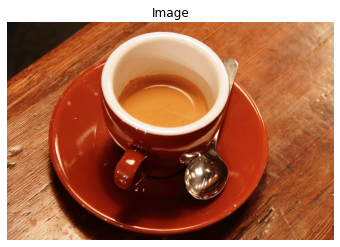

In [15]:
from skimage import data

# Load the image 
original_image = data.coffee()

# Compare the original image
show_image(original_image, "Cup")

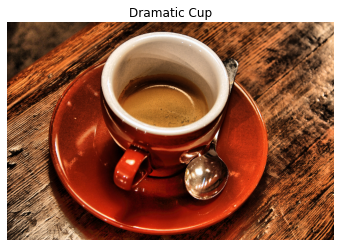

In [16]:
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

show_image(adapthist_eq_image, 'Dramatic Cup')